In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import gensim.downloader



Gensim comes with several already pre-trained models, in the Gensim-data repository. We can import the downloader from the gensim library. We can use the following method to print the list of pre-trained models trained on large datasets available to us. This also  includes models like GloVe and fastext other than word2vec.



What can you do with pre-trained word embeddings?


- Finding word or phrase similarities

- As feature weights for text classification

- For creating an embedding layer for neural network based text classification

- For machine translation

- Query expansion for search enhancements

- To create sentence embeddings through vector averaging


In [4]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
google_news = gensim.downloader.load('word2vec-google-news-300')
google_news.most_similar('twitter')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


[('Twitter', 0.8908904194831848),
 ('Twitter.com', 0.7536780834197998),
 ('tweet', 0.7431626319885254),
 ('tweeting', 0.7161932587623596),
 ('tweeted', 0.7137226462364197),
 ('facebook', 0.6988551616668701),
 ('tweets', 0.6974530816078186),
 ('Tweeted', 0.6950210928916931),
 ('Tweet', 0.6875007152557373),
 ('Tweeting', 0.6845167279243469)]

In [ ]:
google_news.doesnt_match(["bernie","obama","pelosi","orange"])


'orange'

Lets train our own model

In [5]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Arunimad/CCIR_ChatGPT_AI-Linguistics/main/datasets/Corona_NLP_train.csv', encoding='latin1')

In [6]:
import re
texts=[]
for i in range(0,len(dataset)):
  text = re.sub('[^a-zA-Z]' , ' ', dataset['OriginalTweet'][i])
  text = text.lower()
  text = text.split()
  x = len(text) if text.count('https') ==0  else text.index('https')
  text = text[: x ]
  text = [t for t in text if not t=='https']
  text = ' '.join(text)
  texts.append(text)


In [7]:
print(len(texts))

41157


In [8]:
from gensim.models import Word2Vec

In [9]:
sentences = [line.split() for line in texts]

w2v =Word2Vec(sentences, vector_size=100, window=5, workers=4, min_count=5)

In [ ]:
print(sentences[20:25])

[['with', 'nations', 'inficted', 'with', 'covid', 'the', 'world', 'must', 'not', 'play', 'fair', 'with', 'china', 'goverments', 'must', 'demand', 'china', 'adopts', 'new', 'guilde', 'lines', 'on', 'food', 'safty', 'the', 'chinese', 'goverment', 'is', 'guilty', 'of', 'being', 'irosponcible', 'with', 'life', 'on', 'a', 'global', 'scale'], [], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 'adult', 'cinema', 'hotmovies', 'iptvnew', 'iptv', 'adult'], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 

parameters


Size refers to the size of the word embedding that it would output.

Window refers to the maximum distance between the current and predicted word within a sentence.

The min_count parameter is used to set a minimum frequency for the words to be a part of the model: i.e. it ignores all words with count less than min_count.

workers- uses those many worker threads to train the model. This can be adjusted as per the number of cores your system has. In simple words, it refers to parallelism while training the model.


In [10]:
words = list(w2v.wv.index_to_key)

In [11]:
print(words)

['the', 'to', 'and', 'of', 'covid', 'a', 'in', 'coronavirus', 'for', 'is', 'are', 'i', 'you', 'on', 's', 'this', 'prices', 'at', 'it', 'food', 'supermarket', 'we', 'store', 'that', 'with', 'grocery', 'have', 'as', 'be', 'people', 't', 'from', 'amp', 'all', 'can', 'consumer', 'your', 'not', 'will', 'they', 'my', 'our', 'up', 'out', 'has', 'or', 'by', 'more', 'but', 'shopping', 'if', 'online', 'how', 'their', 'during', 'pandemic', 'so', 'now', 'no', 'what', 'get', 'about', 'who', 'need', 'workers', 'panic', 'just', 'there', 'us', 'do', 'like', 'time', 'sanitizer', 'home', 'was', 'an', 'demand', 'go', 'when', 'some', 'help', 'hand', 'stock', 'don', 're', 'going', 'one', 'm', 'me', 'here', 'due', 'buying', 'been', 'oil', 'new', 'crisis', 'please', 'work', 'them', 'after', 'other', 'toilet', 'because', 'only', 'these', 'should', 'toiletpaper', 'than', 'paper', 'today', 'over', 'stay', 'local', 'retail', 'keep', 'buy', 'stores', 'many', 'shelves', 'still', 'being', 'make', 'delivery', 'those

In [12]:
print(len(words))

10630


In [14]:
print( w2v.wv['software'] )

[ 0.00123913  0.221512   -0.04057239 -0.07720892 -0.06763563 -0.3066505
  0.00502023  0.37625706 -0.02613647 -0.10642264 -0.02848882 -0.22737867
  0.16907372  0.2622204   0.10830659 -0.11362565  0.05554457 -0.18601337
 -0.04367674 -0.1044834   0.19171496 -0.02917679  0.22906375 -0.13033853
  0.02013015 -0.2431468  -0.167878   -0.05097189  0.02014187 -0.04171104
  0.02925922  0.06716478  0.20566063 -0.25715882  0.07727269  0.16653354
 -0.01542636 -0.00610117 -0.06331693 -0.08745787  0.05983299 -0.21060427
  0.04919849 -0.05629507  0.04430267 -0.02808681 -0.03566308 -0.05892335
 -0.12129082  0.2849819   0.23630801  0.08439216 -0.12746525 -0.11380131
 -0.0175064  -0.2130831   0.13743308 -0.03746711 -0.09434211  0.23342873
  0.04550817 -0.08718026  0.05272396 -0.12614691 -0.3104085   0.20564258
  0.09471346  0.01622359 -0.34732687  0.31236658  0.0318726  -0.12662803
  0.07260563 -0.0432012  -0.02042131 -0.2011382   0.01921106  0.0362878
 -0.01246548  0.20890221 -0.26782668 -0.04483494 -0.2

In [15]:
w2v.wv.similarity('vladimir', 'putin')

0.8682974

In [16]:
w2v.wv.similarity('vladimir', 'trump')

0.6682379

In [17]:
print(w2v.wv.most_similar('covid'))

[('coronavirus', 0.6645541191101074), ('coronacrisis', 0.6048349142074585), ('corona', 0.6028264760971069), ('virus', 0.596923291683197), ('novel', 0.5420989394187927), ('panicshopping', 0.5366470813751221), ('coronavirusuk', 0.5296114087104797), ('coronavirusupdate', 0.5289132595062256), ('coronacrisisuk', 0.5270441174507141), ('coronaviruspandemic', 0.5263425707817078)]


In [18]:
w2v.wv.doesnt_match(['grocery', 'covid', 'coronavirus'])

'grocery'

Visualising word vectors

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

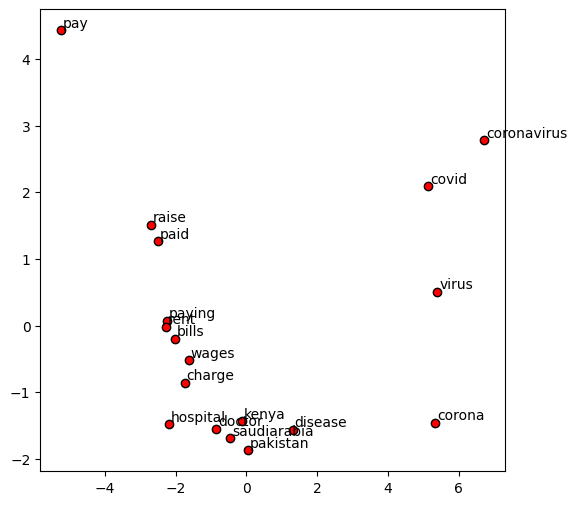

In [24]:
display_pca_scatterplot(w2v,['coronavirus', 'covid', 'virus', 'corona','disease', 'saudiarabia',  'doctor', 'hospital', 'pakistan', 'kenya',
                             'pay', 'paying', 'paid', 'wages', 'raise', 'bills', 'rent', 'charge']  )

In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.vocab.keys()), sample) # Use model.wv
        else:
            words = [ word for word in model.wv.vocab ] # Use model.wv

    word_vectors = np.array([model.wv[w] for w in words]) # Use model.wv

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

To try

https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

To do
- have a read on 'Word2Vec' documentation
- Download .csv file
- use gensim and word2vec to create your own embedding
- Try to get words related to 'market', 'amazon', and 'delivery'
- Also, try to print the word embedding for the word 'amazon'
- try to change the vector size (we used 100, for for less/high). and then check the 2D plot for the follwoing words
('tasty', 'amazing', 'thanks', 'fruits', 'delicious', 'waitress', 'fresh', 'time', 'package', 'delivery', 'costly')

Advanced:

Change the vector_size=10, 100,1000. And see how the plot changes!

HinT:
If someone has issues download 300 Mb and related computer expense while traning. You can see reviews_amazon.csv in my githun, which is a smaller version which you can use. Its just 25K lines instead of 600K lines and so we will lose accuracy, but should be okay for the demonstration purpose :)